<h1><center><h><center><font color='Red'> Melanoma   <font color='Blue'> Detection <font color='Green'> Assignement :

<h5><center> By <br><br>
Farooq Ahmed,MSc IBF(Liverpool JMU), MBA (City London), EPAT <br>
email <font color='Blue'>Farooqams@hotmail.com<font color='Blue'> <br>
https://www.linkedin.com/in/farooqams/
<h4><center> Feb 2022<br><br>

#### Objective of the Assignement 

###### The assignement required to model CNN  which can accurately detect melanoma. using data from 
###### https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view?usp=sharing



###### We will approach the problem by  assessing the significant drivers and identifying the problem by Pythonic way, reducing duplcating task where possible / applicable. In addtion, using in Google Colab Pro GPU. 

### Project Pipeline
1. Data Reading/Data Understanding → Defining the path for train and test images 
2. Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
3. Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset 
Model Building & training :
****************** 
4. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
5. Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
6. Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
7. Chose an appropriate data augmentation strategy to resolve underfitting/overfitting 
*******************
8. Model Building & training on the augmented data :
Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
9. Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
10. Write your findings after the model fit, see if the earlier issue is resolved or not?
11. Class distribution: Examine the current class distribution in the training dataset 
- Which class has the least number of samples?
- Which classes dominate the data in terms of the proportionate number of samples?
12. Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
***********************
13. Model Building & training on the rectified class imbalance data :
Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
14. Choose an appropriate optimiser and loss function for model training
Train the model for ~30 epochs
15. Write your findings after the model fit, see if the issues are resolved or not?

# Reset Colab Drive - Optional 

In [1]:
#from google.colab import drive
#drive.flush_and_unmount()

In [2]:
#!rm -rf /content/data 
#!rm -rf /content/Train

# Version Control

In [3]:
%tensorflow_version 2.x

In [4]:
import tensorflow
print(tensorflow.__version__)

2.7.0


# BenchMarking System Resources

In [5]:
import psutil
cpu = psutil.cpu_count(logical=True)
print('Your runtime has {:.0f} available CPUs\n'.format(cpu))
psutil.disk_usage('/content')

Your runtime has 4 available CPUs



sdiskusage(total=179134558208, used=46175580160, free=132942200832, percent=25.8)

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Mon Jan 31 19:43:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Install Library [Not Available in Colab]

In [8]:
pip install -U tensorflow-addons Augmentor -q 

# Import Library

In [9]:
%%time
import warnings
warnings.filterwarnings('ignore')

import datetime ## download to convert loan formating
import numpy as np 
import pandas as pd


import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## DL Library 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical 
import tensorflow_addons as tfa
import Augmentor


sns.set_style('white') 
sns.color_palette("rocket", as_cmap=True)
sns.light_palette("green", as_cmap=True)
plt.rcParams['font.family'] = 'serif'
plt.style.use('seaborn-bright')
%matplotlib inline

import os

# Disable limit of display
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 30)
pd.options.display.float_format = "{:,.2f}".format ## This libary parameter is downloaded keep the loan in Notional Decimal.

from IPython.display import display, HTML

from scipy.stats import norm

import pathlib
import tqdm
from glob import glob
import PIL

CPU times: user 303 ms, sys: 190 ms, total: 492 ms
Wall time: 320 ms


In [10]:
# check version
print(tf.__version__)

2.7.0


In [11]:
%%time
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

CPU times: user 38.1 ms, sys: 979 µs, total: 39 ms
Wall time: 41.4 ms


*Authenticate* and create the PyDrive client.

In [12]:
%%time
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

CPU times: user 37 ms, sys: 1.62 ms, total: 38.6 ms
Wall time: 88.4 ms


# Download  and Cleaning Data


In [13]:
%%time
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
CPU times: user 23.1 ms, sys: 1.35 ms, total: 24.5 ms
Wall time: 2.57 s


In [14]:
!ls #'/content/gdrive'

adc.json  gdrive  sample_data


In [15]:
os.mkdir('/content/data')

In [16]:
!cp -av '/content/gdrive/MyDrive/data/data' '/content'

'/content/gdrive/MyDrive/data/data/Test' -> '/content/data/Test'
'/content/gdrive/MyDrive/data/data/Test/vascular lesion' -> '/content/data/Test/vascular lesion'
'/content/gdrive/MyDrive/data/data/Test/vascular lesion/ISIC_0024370.jpg' -> '/content/data/Test/vascular lesion/ISIC_0024370.jpg'
'/content/gdrive/MyDrive/data/data/Test/vascular lesion/ISIC_0024402.jpg' -> '/content/data/Test/vascular lesion/ISIC_0024402.jpg'
'/content/gdrive/MyDrive/data/data/Test/vascular lesion/ISIC_0024375.jpg' -> '/content/data/Test/vascular lesion/ISIC_0024375.jpg'
'/content/gdrive/MyDrive/data/data/Test/melanoma' -> '/content/data/Test/melanoma'
'/content/gdrive/MyDrive/data/data/Test/melanoma/ISIC_0000026.jpg' -> '/content/data/Test/melanoma/ISIC_0000026.jpg'
'/content/gdrive/MyDrive/data/data/Test/melanoma/ISIC_0000049.jpg' -> '/content/data/Test/melanoma/ISIC_0000049.jpg'
'/content/gdrive/MyDrive/data/data/Test/melanoma/ISIC_0000054.jpg' -> '/content/data/Test/melanoma/ISIC_0000054.jpg'
'/content/g

In [17]:
root_path = '/content/data' # use CoLab Drive for faster processing #'/content/gdrive/MyDrive/data/data'
data_train = pathlib.Path(root_path + '/Train')
data_test = pathlib.Path(root_path + '/Test')

In [18]:
image_count_train = len(list(data_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_test.glob('*/*.jpg')))
print(image_count_test)

2249
118


# Dataset and Parameters

In [19]:
# Parameters 
validation_split = 0.2
seed=123 # as per requirement
batch_size_setting = 32 # needs to change
height_pixel = 180
width_pixel = 180
layers_pixel = 3
epochs_size = 30

## train dataset 

In [20]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  validation_split=validation_split,
  subset="training",
  seed=seed,
  image_size=(height_pixel, width_pixel),  batch_size=batch_size_setting)

Found 2249 files belonging to 9 classes.
Using 1800 files for training.


## validation dataset

In [21]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  validation_split=validation_split,
  subset="validation",
  seed=seed,
  image_size=(height_pixel, width_pixel),
  batch_size=batch_size_setting)

Found 2249 files belonging to 9 classes.
Using 449 files for validation.


## test dataset

In [22]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_test,
  image_size=(height_pixel, width_pixel),
  batch_size=batch_size_setting)

Found 118 files belonging to 9 classes.


## List of all the classes of skin cancer

In [23]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize 

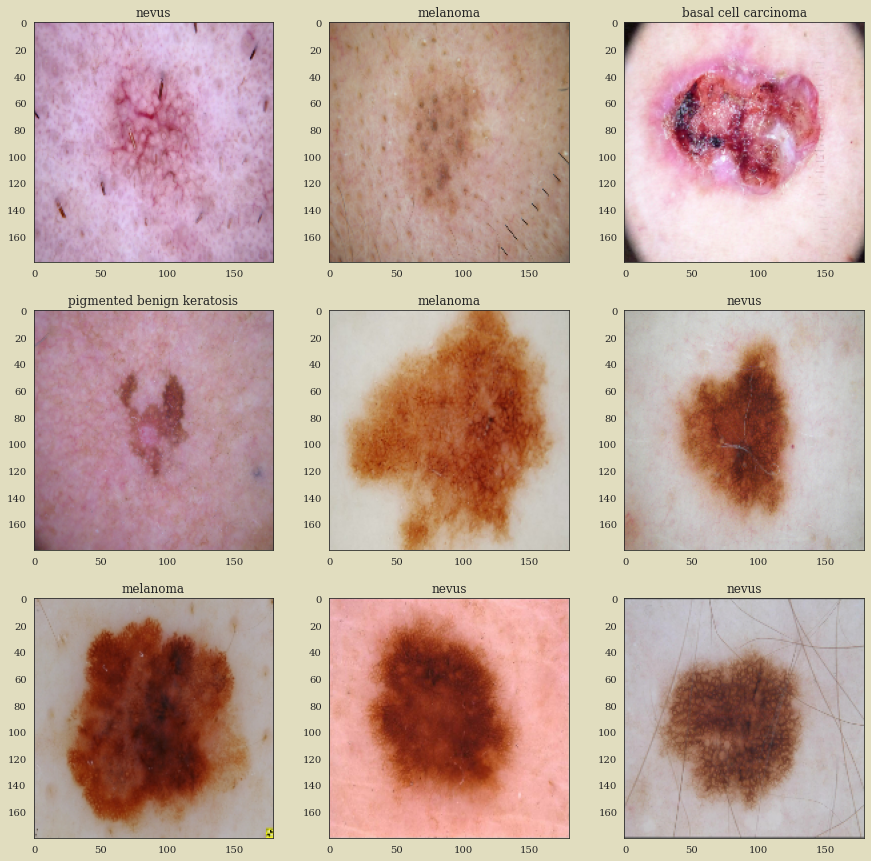

In [24]:
plt.figure(figsize=(15, 15),linewidth=5, facecolor="#e1ddbf")
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on") # pixel size 
    ax.set_facecolor("#e1ddbf")
  plt.show()

## Vectorizing mapping Applied 
https://www.tensorflow.org/guide/data_performance 

```

```


https://www.tensorflow.org/api_docs/python/tf/data/Dataset#range


In [25]:
## in order optimize process time. 

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Run model 1

Model Building & training : 
Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.

In [26]:
preprocessing_layers = [
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height_pixel, width_pixel, layers_pixel))
] ## Update coding and standardise variables

In [27]:
input_shape = (height_pixel, width_pixel,layers_pixel)
lr = 1e-5
init = 'normal' # check 
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height_pixel, width_pixel, layers_pixel)))
model.add(Conv2D(batch_size_setting, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(batch_size_setting, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(batch_size_setting*2, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(batch_size_setting*4, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(batch_size_setting*16, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))


In [28]:
optimizer = 'adam'
loss_fn = "binary_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper (ModuleWrapp  (None, 178, 178, 32)     896       
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 176, 176, 32)     9248      
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 88, 88, 32)       0         
 pper)                                                           
                                                                 
 module_wrapper_3 (ModuleWra  (None, 86, 86, 64)       18496     
 pper)                                                  

In [30]:
epochs = epochs_size
batch_size = batch_size_setting

# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model.fit(
  train_ds,
  batch_size=batch_size_setting,
  validation_data=val_ds,
  epochs=epochs ,verbose=0,
          callbacks=[tqdm_callback]
)

Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/57           ETA: ?s - 

Epoch 2/30


0/57           ETA: ?s - 

Epoch 3/30


0/57           ETA: ?s - 

Epoch 4/30


0/57           ETA: ?s - 

Epoch 5/30


0/57           ETA: ?s - 

Epoch 6/30


0/57           ETA: ?s - 

Epoch 7/30


0/57           ETA: ?s - 

Epoch 8/30


0/57           ETA: ?s - 

Epoch 9/30


0/57           ETA: ?s - 

Epoch 10/30


0/57           ETA: ?s - 

Epoch 11/30


0/57           ETA: ?s - 

Epoch 12/30


0/57           ETA: ?s - 

Epoch 13/30


0/57           ETA: ?s - 

Epoch 14/30


0/57           ETA: ?s - 

Epoch 15/30


0/57           ETA: ?s - 

Epoch 16/30


0/57           ETA: ?s - 

Epoch 17/30


0/57           ETA: ?s - 

Epoch 18/30


0/57           ETA: ?s - 

Epoch 19/30


0/57           ETA: ?s - 

Epoch 20/30


0/57           ETA: ?s - 

Epoch 21/30


0/57           ETA: ?s - 

Epoch 22/30


0/57           ETA: ?s - 

Epoch 23/30


0/57           ETA: ?s - 

Epoch 24/30


0/57           ETA: ?s - 

Epoch 25/30


0/57           ETA: ?s - 

Epoch 26/30


0/57           ETA: ?s - 

Epoch 27/30


0/57           ETA: ?s - 

Epoch 28/30


0/57           ETA: ?s - 

Epoch 29/30


0/57           ETA: ?s - 

Epoch 30/30


0/57           ETA: ?s - 

# Visualizing results

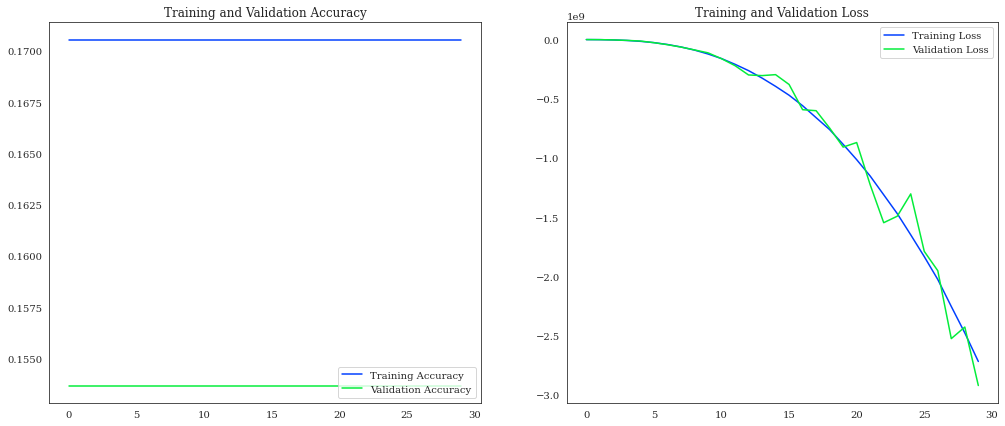

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(17, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model Overfit or Underfit 

In [32]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


# Hence its Overfit and we need to chose right data augumentation strategy

15/15 [==============================] - 0s 10ms/step - loss: -2922156544.0000 - accuracy: 0.1537
Accuracy:  0.17055556178092957
Validation Accuracy:  0.15367482602596283
Loss:  -2909011968.0
Validation Loss -2922156544.0


# Keras ImageDataGenerator 
Chose an appropriate data augmentation strategy to resolve underfitting/overfitting 



Ref : 
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [33]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagen.flow_from_directory(data_train, 
    target_size = (height_pixel, width_pixel),
    classes = image_class,
    batch_size = batch_size_setting *2 # 64
 )

valid_batches = datagen.flow_from_directory(data_test, 
    target_size = (height_pixel, width_pixel),
    classes = image_class,
    batch_size = batch_size_setting * 2 # 64 
)

Found 890 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


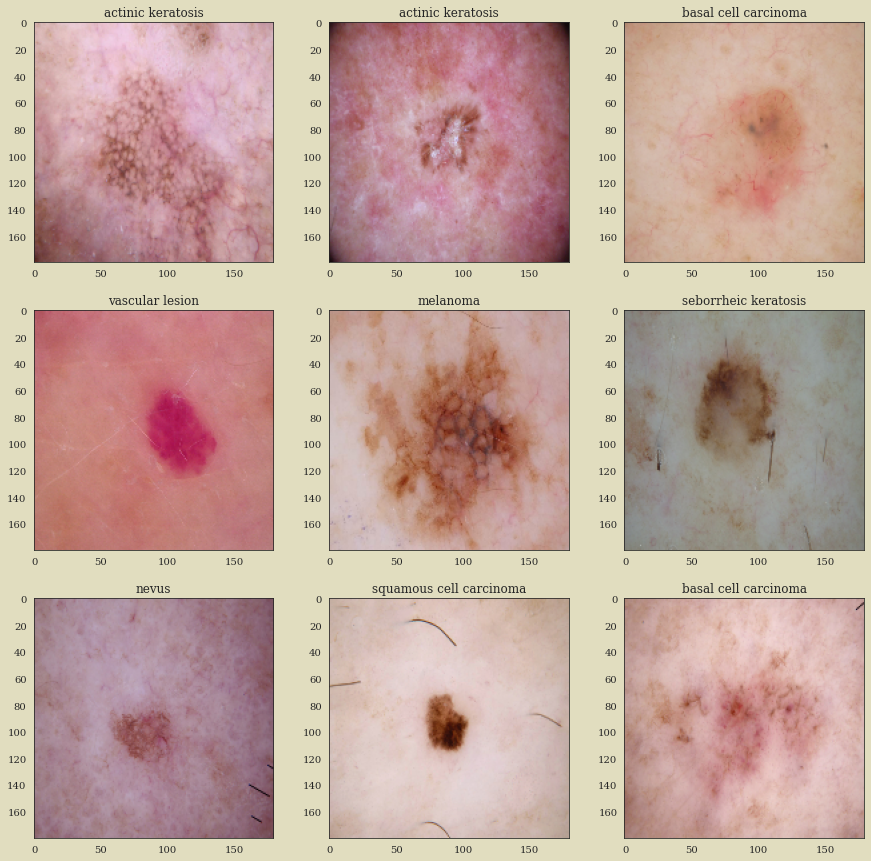

In [34]:
# visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(15, 15),linewidth=5, facecolor="#e1ddbf")
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on") # pixel size 
    ax.set_facecolor("#e1ddbf")
  plt.show()

# Run model 2
Model Building & training on the augmented data :
Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
Choose an appropriate optimiser and loss function for model training
Train the model for ~20 epochs
Write your findings after the model fit, see if the earlier issue is resolved or not?

In [35]:

model = Sequential()

# Increse the model size by adding another 32 layer
model.add(Conv2D(batch_size_setting, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(batch_size_setting, kernel_size=(3, 3), activation='relu', padding='same'))
# Max Pool size of 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(batch_size_setting*2, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(batch_size_setting*2, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(batch_size_setting*4, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(batch_size_setting*16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

#model.summary()

In [36]:
model.build(input_shape=(None, height_pixel, width_pixel, layers_pixel))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_15 (ModuleWr  (None, 180, 180, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_16 (ModuleWr  (None, 180, 180, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_17 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_18 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_19 (ModuleWr  (None, 90, 90, 64)      

# Compiling Model 2

In [38]:
optimizer = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) #0.001 LR

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [39]:
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

## Your code goes here, note: train your model for 20 epochs
epochs = epochs_size
batch_size = batch_size_setting
history = model.fit(train_batches,
  epochs = epochs, verbose = 0, validation_data=valid_batches, callbacks=[tqdm_callback])# , callbacks=[learning_rate_reduction])



Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/14           ETA: ?s - 

Epoch 2/30


0/14           ETA: ?s - 

Epoch 3/30


0/14           ETA: ?s - 

Epoch 4/30


0/14           ETA: ?s - 

Epoch 5/30


0/14           ETA: ?s - 

Epoch 6/30


0/14           ETA: ?s - 

Epoch 7/30


0/14           ETA: ?s - 

Epoch 8/30


0/14           ETA: ?s - 

Epoch 9/30


0/14           ETA: ?s - 

Epoch 10/30


0/14           ETA: ?s - 

Epoch 11/30


0/14           ETA: ?s - 

Epoch 12/30


0/14           ETA: ?s - 

Epoch 13/30


0/14           ETA: ?s - 

Epoch 14/30


0/14           ETA: ?s - 

Epoch 15/30


0/14           ETA: ?s - 

Epoch 16/30


0/14           ETA: ?s - 

Epoch 17/30


0/14           ETA: ?s - 

Epoch 18/30


0/14           ETA: ?s - 

Epoch 19/30


0/14           ETA: ?s - 

Epoch 20/30


0/14           ETA: ?s - 

Epoch 21/30


0/14           ETA: ?s - 

Epoch 22/30


0/14           ETA: ?s - 

Epoch 23/30


0/14           ETA: ?s - 

Epoch 24/30


0/14           ETA: ?s - 

Epoch 25/30


0/14           ETA: ?s - 

Epoch 26/30


0/14           ETA: ?s - 

Epoch 27/30


0/14           ETA: ?s - 

Epoch 28/30


0/14           ETA: ?s - 

Epoch 29/30


0/14           ETA: ?s - 

Epoch 30/30


0/14           ETA: ?s - 

<built-in method keys of dict object at 0x7f66af446be0> :


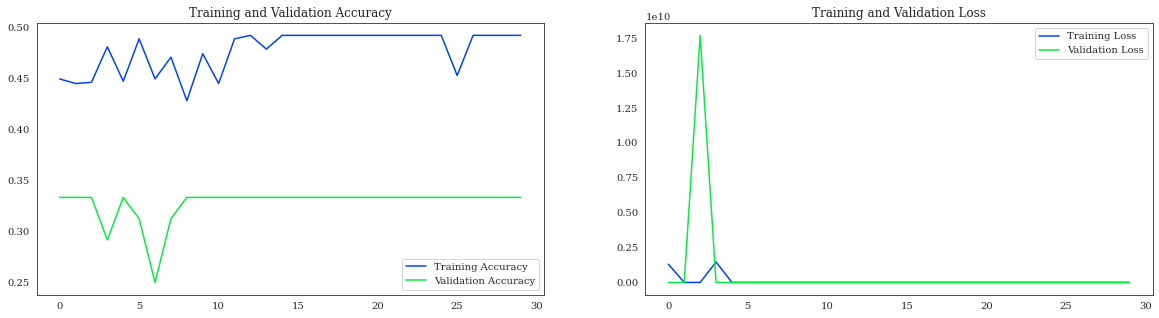

In [40]:
acc = history.history['accuracy']
print(history.history.keys, ":")
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
loss, accuracy = model.evaluate(train_batches, verbose=1,)
loss_v, accuracy_v = model.evaluate(valid_batches, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

1/1 [==============================] - 4s 4s/step - loss: 1.2878 - accuracy: 0.3333
Accuracy:  0.49213483929634094
Validation Accuracy:  0.3333333432674408
Loss:  0.9551423192024231
Validation Loss 1.2877827882766724


# Class imbalance Fix

<Figure size 360x504 with 0 Axes>

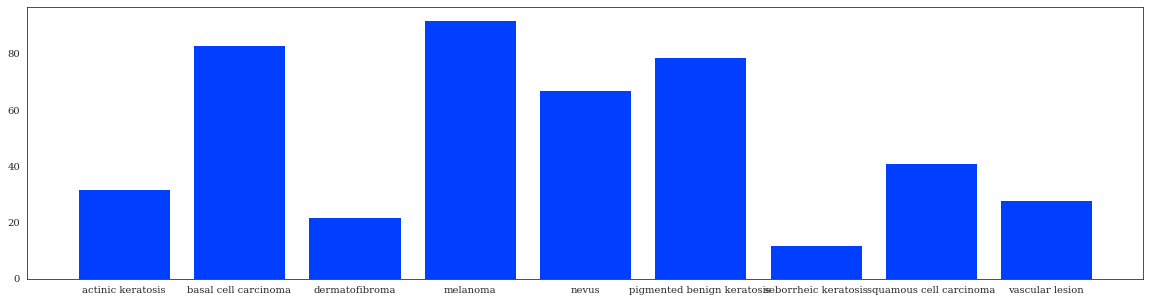

In [42]:
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(5, 7))
for images, labels in train_ds:
  for i in range(8):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()


# Augmentor 

https://github.com/mdbloice/Augmentor
https://augmentor.readthedocs.io/en/master/userguide/examples.html

In [43]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [44]:
os.mkdir('Train')

In [45]:
#path_to_training_dataset="/content/Train/"
#for i in class_names:
#  print(path_to_training_dataset+i)
#  os.mkdir(path_to_training_dataset+i)
  

In [46]:
# p = Augmentor.Pipeline('/content/Train/actinic keratosis')

In [47]:

#path_to_training_dataset="/content/Train/"
#path_to_training_dataset = pathlib.Path(root_path + '/Train/')

# for i in class_names:
#p = Augmentor.Pipeline(path_to_training_dataset)
#p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

In [48]:
path_to_training_dataset=pathlib.Path(root_path + '/Train')
import Augmentor
for i in (class_names):# tqdm.tqdm
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i+ "/")
    #str(path) + "/" + "photo.png", img)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 124 image(s) found.
Output directory set to /content/data/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F679369FC10>: 100%|██████████| 500/500 [00:08<00:00, 59.60 Samples/s] 


Initialised with 376 image(s) found.
Output directory set to /content/data/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F66AC795F10>: 100%|██████████| 500/500 [00:08<00:00, 61.52 Samples/s] 


Initialised with 95 image(s) found.
Output directory set to /content/data/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F66AC783590>: 100%|██████████| 500/500 [00:08<00:00, 58.71 Samples/s] 


Initialised with 438 image(s) found.
Output directory set to /content/data/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F674501D490>: 100%|██████████| 500/500 [00:41<00:00, 12.19 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/data/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F66C64BFD90>: 100%|██████████| 500/500 [00:39<00:00, 12.58 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/data/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6793862E10>: 100%|██████████| 500/500 [00:08<00:00, 61.92 Samples/s] 


Initialised with 77 image(s) found.
Output directory set to /content/data/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F66AC7939D0>: 100%|██████████| 500/500 [00:19<00:00, 25.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/data/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6793802390>: 100%|██████████| 500/500 [00:08<00:00, 61.98 Samples/s] 


Initialised with 139 image(s) found.
Output directory set to /content/data/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6793882A10>: 100%|██████████| 500/500 [00:08<00:00, 61.75 Samples/s] 


In [49]:
image_count_train = len(list(data_train.glob('*/*.jpg')))
print(image_count_train)

2249


In [50]:
data_train

PosixPath('/content/data/Train')

In [51]:
path_list = [x for x in glob(os.path.join(data_train, '*','output', '*.jpg'))]
path_list

['/content/data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031874.jpg_8eb73921-04fe-4651-b0bf-10f827e08c04.jpg',
 '/content/data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031743.jpg_21976fc0-0e27-4c5b-809f-cf8e0d32511b.jpg',
 '/content/data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026152.jpg_b67301e5-034c-4792-a58a-ac8c71100102.jpg',
 '/content/data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0024923.jpg_41ffee23-ccc1-432c-8352-bcba5e64f053.jpg',
 '/content/data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0026327.jpg_e9faed1f-32bc-4514-ba98-480611c5640d.jpg',
 '/content/data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030986.jpg_c5cd42ec-85d0-4a9c-b9ad-fd29dccd96d5.jpg',
 '/content/data/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030803.jpg_560f16b2-e0dc-4adf-97

In [52]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [53]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [54]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [55]:
new_df['Label'].value_counts()

nevus                         500
pigmented benign keratosis    500
vascular lesion               500
actinic keratosis             500
basal cell carcinoma          500
melanoma                      500
seborrheic keratosis          500
dermatofibroma                500
squamous cell carcinoma       500
Name: Label, dtype: int64

# Model 3 - with  Augmentor

## train dataset 

In [56]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  validation_split=validation_split,
  subset="training",
  seed=seed,
  image_size=(height_pixel, width_pixel),  batch_size=batch_size_setting)

Found 6749 files belonging to 9 classes.
Using 5400 files for training.


## validation dataset

In [57]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train,
  validation_split=validation_split,
  subset="validation",
  seed=seed,
  image_size=(height_pixel, width_pixel),
  batch_size=batch_size_setting)

Found 6749 files belonging to 9 classes.
Using 1349 files for validation.


## test dataset

In [58]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_test,
  image_size=(height_pixel, width_pixel),
  batch_size=batch_size_setting)

Found 118 files belonging to 9 classes.


In [59]:

model = Sequential()

# Increse the model size by adding another 32 layer
model.add(Conv2D(batch_size_setting, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(batch_size_setting, kernel_size=(3, 3), activation='relu', padding='same'))
# Max Pool size of 2*2
model.add(MaxPool2D(pool_size=(2, 2)))
# Adding Dropout Layer
model.add(Dropout(0.25))

model.add(Conv2D(batch_size_setting*2, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(batch_size_setting*2, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(batch_size_setting*4, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(batch_size_setting*16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

#model.summary()

In [60]:
model.build(input_shape=(None, height_pixel, width_pixel, layers_pixel))

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 module_wrapper_30 (ModuleWr  (None, 180, 180, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_31 (ModuleWr  (None, 180, 180, 32)     9248      
 apper)                                                          
                                                                 
 module_wrapper_32 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_33 (ModuleWr  (None, 90, 90, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_34 (ModuleWr  (None, 90, 90, 64)      

In [62]:
optimizer = Adam(learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False) #0.001 LR

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [63]:
# initialize tqdm callback with default parameters
tqdm_callback = tfa.callbacks.TQDMProgressBar()

## Your code goes here, note: train your model for 20 epochs
epochs = epochs_size
batch_size = batch_size_setting
history = model.fit(train_batches,
  epochs = epochs, verbose = 0, validation_data=valid_batches, callbacks=[tqdm_callback])# , callbacks=[learning_rate_reduction])



Training:   0%|           0/30 ETA: ?s,  ?epochs/s

Epoch 1/30


0/14           ETA: ?s - 

Epoch 2/30


0/14           ETA: ?s - 

Epoch 3/30


0/14           ETA: ?s - 

Epoch 4/30


0/14           ETA: ?s - 

Epoch 5/30


0/14           ETA: ?s - 

Epoch 6/30


0/14           ETA: ?s - 

Epoch 7/30


0/14           ETA: ?s - 

Epoch 8/30


0/14           ETA: ?s - 

Epoch 9/30


0/14           ETA: ?s - 

Epoch 10/30


0/14           ETA: ?s - 

Epoch 11/30


0/14           ETA: ?s - 

Epoch 12/30


0/14           ETA: ?s - 

Epoch 13/30


0/14           ETA: ?s - 

Epoch 14/30


0/14           ETA: ?s - 

Epoch 15/30


0/14           ETA: ?s - 

Epoch 16/30


0/14           ETA: ?s - 

Epoch 17/30


0/14           ETA: ?s - 

Epoch 18/30


0/14           ETA: ?s - 

Epoch 19/30


0/14           ETA: ?s - 

Epoch 20/30


0/14           ETA: ?s - 

Epoch 21/30


0/14           ETA: ?s - 

Epoch 22/30


0/14           ETA: ?s - 

Epoch 23/30


0/14           ETA: ?s - 

Epoch 24/30


0/14           ETA: ?s - 

Epoch 25/30


0/14           ETA: ?s - 

Epoch 26/30


0/14           ETA: ?s - 

Epoch 27/30


0/14           ETA: ?s - 

Epoch 28/30


0/14           ETA: ?s - 

Epoch 29/30


0/14           ETA: ?s - 

Epoch 30/30


0/14           ETA: ?s - 

<built-in method keys of dict object at 0x7f6793738780> :


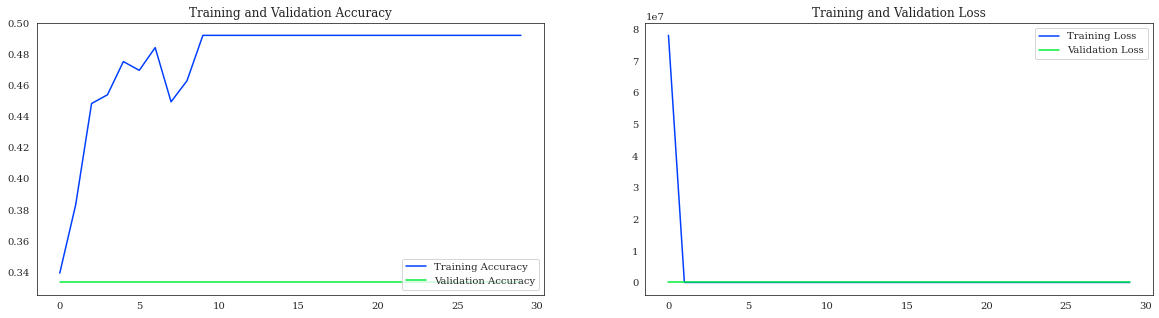

In [64]:
acc = history.history['accuracy']
print(history.history.keys, ":")
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
loss, accuracy = model.evaluate(train_batches, verbose=1,)
loss_v, accuracy_v = model.evaluate(valid_batches, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

1/1 [==============================] - 4s 4s/step - loss: 1.3050 - accuracy: 0.3333
Accuracy:  0.49213483929634094
Validation Accuracy:  0.3333333432674408
Loss:  0.9568409323692322
Validation Loss 1.304991364479065


# Conclusion 

The result has marginally helped in reducing overfititng of the data, resulting in loss beng reduced and similarly it reduced the Acurracy.

Initially we tried without the ImageDataGenerator which created data to over fit at high ratio

Then we introduced dropout and ImageDataGenerator which reduced the over fit

At last we tried Batch Normalization and Augumentation which really helped in carry forward